## Q6

Degree 1 MSE: 8.477489288876274


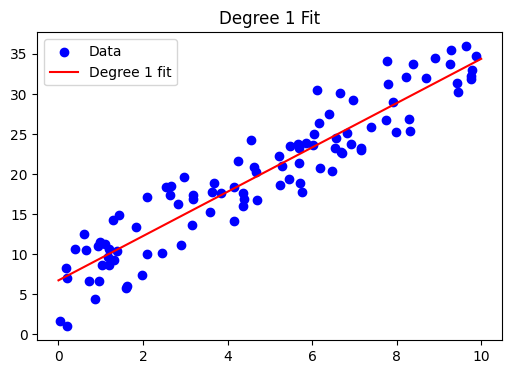

Degree 2 MSE: 8.444000065533471


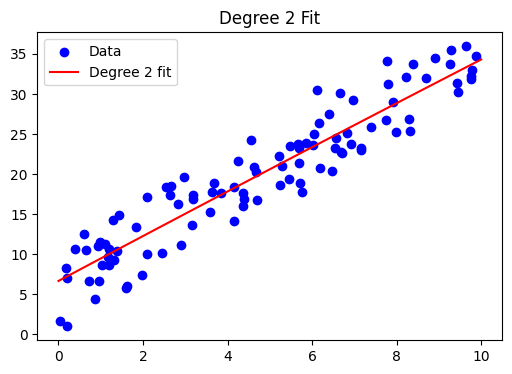

Degree 3 MSE: 8.273319180586087


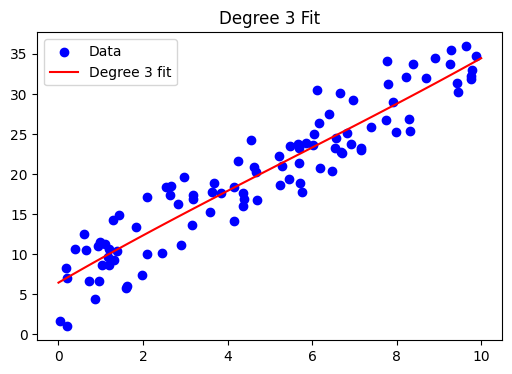

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# part a
np.random.seed(0)
X = np.sort(10 * np.random.rand(100, 1), axis=0)
y_true = 3 * X.squeeze() + 5
noise = np.random.normal(0, 3, X.shape[0])
y = y_true + noise

# part b
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def fit_and_plot(degree):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    print(f'Degree {degree} MSE:', mse)

 # part c
    plt.figure(figsize=(6, 4))
    plt.scatter(X, y, color='blue', label='Data')
    X_line = np.linspace(0, 10, 100).reshape(-1, 1)
    y_line = model.predict(poly.transform(X_line))
    plt.plot(X_line, y_line, color='red', label=f'Degree {degree} fit')
    plt.legend()
    plt.title(f'Degree {degree} Fit')
    plt.show()
# part d
for deg in [1, 2, 3]:
    fit_and_plot(deg)


## Q7

MSE - lr=0.01, final weights: [-0.09157586 -0.01420528  0.04183486 -0.03440394]
LOG - lr=0.01, final weights: [-0.04687705 -0.00726411  0.02108994 -0.01722942]
MSE - lr=0.05, final weights: [-0.38217087 -0.0599203   0.19701734 -0.16899293]
LOG - lr=0.05, final weights: [-0.21359116 -0.0332444   0.10214071 -0.08551769]


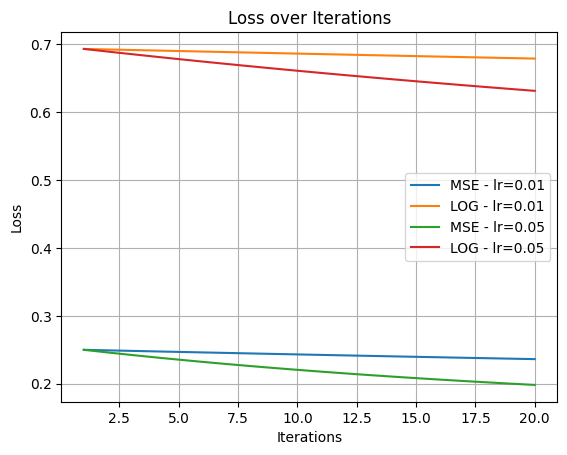

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Loading A2_P2.csv dataset
df = pd.read_csv('/content/drive/MyDrive/A2_P2_ae609303-e3ee-4dc3-85f0-d40fdde4ae63.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Adding intercept term
X = np.c_[np.ones(X.shape[0]), X]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, lr, method='mse'):
    weights = np.zeros(X.shape[1])
    errors = []

    for _ in range(20): # 20 iterations each
        z = X @ weights
        h = sigmoid(z)

        if method == 'mse': # mean square error
            loss = np.mean((h - y) ** 2)
            gradient = 2 * X.T @ (h - y) / X.shape[0]
        elif method == 'log': #maximising log-liklihood
            loss = -np.mean(y * np.log(h + 1e-10) + (1 - y) * np.log(1 - h + 1e-10))
            gradient = X.T @ (h - y) / X.shape[0]
        else:
            raise ValueError("method must be 'mse' or 'log'")

        weights -= lr * gradient
        errors.append(loss)

    return weights, errors

# specifying final weight values
for lr in [0.01, 0.05]:
    for method in ['mse', 'log']:
        weights, error = logistic_regression(X, y, lr=lr, method=method)
        plt.plot(range(1, 21), error, label=f'{method.upper()} - lr={lr}')
        print(f'{method.upper()} - lr={lr}, final weights:', weights)

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.legend()
plt.grid(True)
plt.show()


## Q8

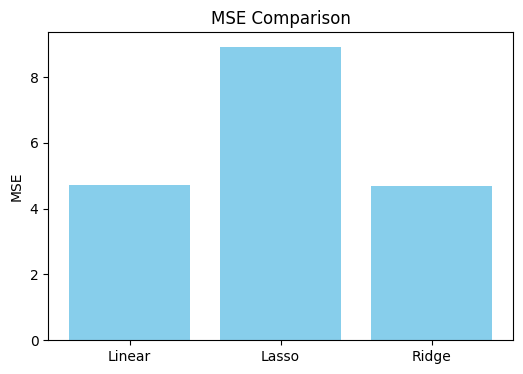

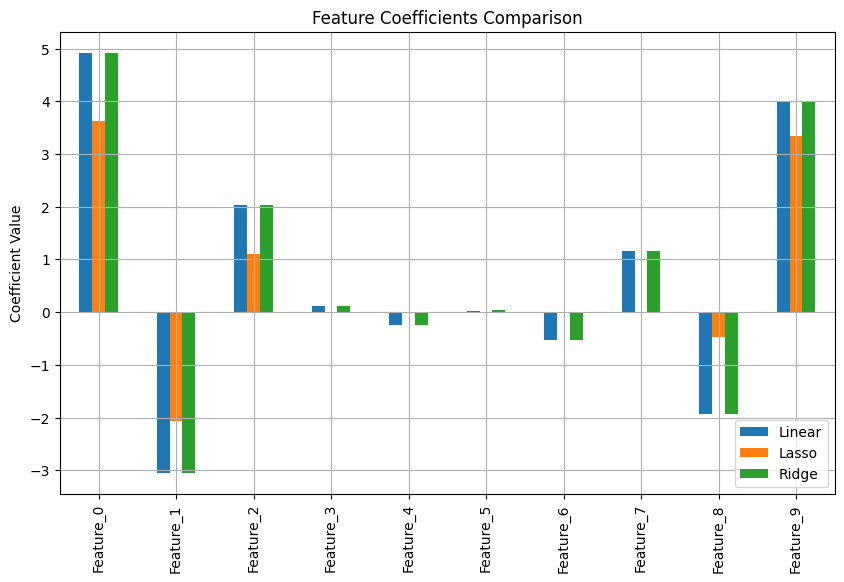

In [4]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Loading A2_P3.csv dataset
data = pd.read_csv('/content/drive/MyDrive/A2_P3_744f5041-4369-44f9-be92-7dacb5a520d7.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#different implementation of models
models = {
    'Linear': LinearRegression(),
    'Lasso': Lasso(alpha=1),
    'Ridge': Ridge(alpha=0.1)
}

mse_scores = {}
coefficients = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_scores[name] = mean_squared_error(y_test, y_pred)
    coefficients[name] = model.coef_

# MSE Comparison
plt.figure(figsize=(6, 4))
plt.bar(mse_scores.keys(), mse_scores.values(), color='skyblue')
plt.title('MSE Comparison')
plt.ylabel('MSE')
plt.show()

# Coefficient Comparison
coeff_df = pd.DataFrame(coefficients, index=X.columns)
coeff_df.plot(kind='bar', figsize=(10, 6), title='Feature Coefficients Comparison')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()
